<h2>Analizador De datos Demográficos</h2>


Number of each race:
Axes(0.255833,0.11;0.513333x0.77)
Average age of men: 39.49439509954058
Percentage with Bachelors degrees: 16.430531100282543%
Percentage with higher education that earn >50K: 46.1%
Percentage without higher education that earn >50K: 17.3%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 11.1%
Country with highest percentage of rich: native-country
United-States                 10694
?                               220
Philippines                      85
Canada                           63
India                            62
Germany                          58
Mexico                           47
England                          47
China                            36
Cuba                             34
Italy                            34
Japan                            32
Taiwan                           26
Iran                             22
Puerto-Rico                      20
South                            20
Greece             

{'race_count': <Axes: ylabel='count'>,
 'average_age_men': np.float64(39.49439509954058),
 'percentage_bachelors': np.float64(16.430531100282543),
 'higher_education_rich': 46.1,
 'lower_education_rich': 17.3,
 'min_work_hours': np.int64(1),
 'rich_percentage': 11.1,
 'highest_earning_country': native-country
 United-States                 10694
 ?                               220
 Philippines                      85
 Canada                           63
 India                            62
 Germany                          58
 Mexico                           47
 England                          47
 China                            36
 Cuba                             34
 Italy                            34
 Japan                            32
 Taiwan                           26
 Iran                             22
 Puerto-Rico                      20
 South                            20
 Greece                           18
 Poland                           17
 France                

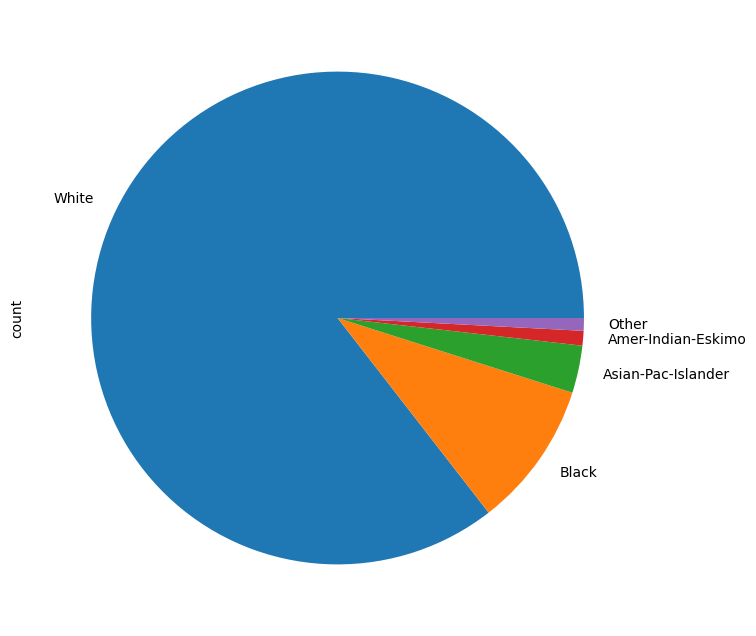

In [6]:
import pandas as pd
import numpy as np


def calculate_demographic_data(print_data=True):
    # Read data from file
    path = 'ExcelFiles/adult.csv'
    df = pd.read_csv(path)

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts().plot(kind='pie', figsize=(12,8))

    # What is the average age of men?
    average_age_men = df.loc[df['gender'] == 'Male', 'age'].mean()

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = (df[df['education'] == 'Bachelors'].shape[0] / df['education'].count()) * 100

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    adv_educ = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])]) #.shape[0] / df['education'].count()) * 100
    higher_education_rich = (adv_educ[adv_educ['income'] == '>50K'].shape[0] / adv_educ.shape[0]) * 100
    higher_education_rich

    # What percentage of people without advanced education make more than 50K?
    wadv_educ = (df[~df['education'].isin(['Bachelors','Masters','Doctorate'])]) #.shape[0] / df['education'].count()) * 100
    lower_education = (adv_educ[adv_educ['income'] == '>50K'].shape[0] / adv_educ.shape[0]) * 100
    lower_education

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])]).value_counts().shape[0]
    lower_education = (df[~df['education'].isin(['Bachelors','Masters','Doctorate'])]).value_counts().shape[0]

    # percentage with salary >50K
    high_education = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])])
    higher_education_rich = round(len(high_education[high_education['income'] == '>50K']) / len(high_education) * 100, 1)
    
    low_education = (df[~df['education'].isin(['Bachelors','Masters','Doctorate'])])
    lower_education_rich = round(len(low_education[low_education['income'] == '>50K']) / len(low_education) * 100, 1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = len(df[df['hours-per-week'] == min_work_hours])
    num_min_workers_df = df[df['hours-per-week'] == min_work_hours]
    rich_percentage = round(len(num_min_workers_df[num_min_workers_df['income'] == '>50K']) / len(num_min_workers_df) * 100, 1)

    # What country has the highest percentage of people that earn >50K?
    country_counts = df['native-country'].value_counts()
    highest_earning_country = df[df['income'] == '>50K']['native-country'].value_counts()
    highest_earning_country_percentage = (highest_earning_country / country_counts * 100).sort_values(ascending=False).head(1)

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['income'] == '>50K') & (df['native-country'] == 'India')]['occupation'].value_counts().head(1)

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print(f"Number of each race:\n{race_count}") 
        print(f"Average age of men: {average_age_men}")
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage': highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }


calculate_demographic_data(print_data=True)

In [2]:
import pandas as pd
import numpy as np

path = 'ExcelFiles/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts().to_frame(name='race_count')
race_count

,race_count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [16]:
# What is the average age of men?
average_age_men = df.loc[df['gender'] == 'Male', 'age'].mean()
average_age_men

np.float64(39.49439509954058)

In [47]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = (df[df['education'] == 'Bachelors'].shape[0] / df['education'].count()) * 100
percentage_bachelors

np.float64(16.430531100282543)

In [53]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
adv_educ = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])]) #.shape[0] / df['education'].count()) * 100
higher_education_rich = (adv_educ[adv_educ['income'] == '>50K'].shape[0] / adv_educ.shape[0]) * 100
higher_education_rich

46.14224902447677

In [ ]:
adv_educ = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])]).value_counts().shape[0]
adv_educ

37527

In [125]:
# percentage with salary >50K
hadv_educ = (df[df['education'].isin(['Bachelors','Masters','Doctorate'])]) #.value_counts().shape[0]
salary = round(len(adv_educ[adv_educ['income'] == '>50K']) / len(adv_educ) * 100, 1)
salary #round(len(adv_educ[adv_educ['income'] == '>50K']) / len(adv_educ) * 100, 1)

46.1

In [128]:
wh = df['hours-per-week'].max()
percent = len(df[df['hours-per-week'] == wh])
wh_df = df[df['hours-per-week'] == wh]
sal = round(len(wh_df[wh_df['income'] == '>50K']) / len(wh_df) * 100, 1)
sal

11.1

In [143]:
# What country has the highest percentage of people that earn >50K?
country_counts = df['native-country'].value_counts()
highest_earning_country = df[df['income'] == '>50K']['native-country'].value_counts()
highest_earning_country_percentage = (highest_earning_country / country_counts * 100).sort_values(ascending=False).head(1)
highest_earning_country_percentage.to_frame()



,count
native-country,
France,42.105263


In [158]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df['income'] == '>50K') & (df['native-country'] == 'India')]['occupation'].value_counts().head(1)
top_IN_occupation

occupation
Prof-specialty    35
Name: count, dtype: int64

In [162]:
min_work_hours = df['hours-per-week'].min()
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage = round(len(num_min_workers[num_min_workers['income'] == '>50K']) / len(num_min_workers) * 100, 1)
rich_percentage

11.1

Number of each race:
race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64
Average age of men: 39.49439509954058
Percentage with Bachelors degrees: 16.430531100282543%
Percentage with higher education that earn >50K: 46.1%
Percentage without higher education that earn >50K: 17.3%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 11.1%
Country with highest percentage of rich: native-country
United-States                 10694
?                               220
Philippines                      85
Canada                           63
India                            62
Germany                          58
Mexico                           47
England                          47
China                            36
Cuba                             34
Italy                            34
Japan                            32
Taiwan                    

{'race_count': race
 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
 Name: count, dtype: int64,
 'average_age_men': np.float64(39.49439509954058),
 'percentage_bachelors': np.float64(16.430531100282543),
 'higher_education_rich': 46.1,
 'lower_education_rich': 17.3,
 'min_work_hours': np.int64(1),
 'rich_percentage': 11.1,
 'highest_earning_country': native-country
 United-States                 10694
 ?                               220
 Philippines                      85
 Canada                           63
 India                            62
 Germany                          58
 Mexico                           47
 England                          47
 China                            36
 Cuba                             34
 Italy                            34
 Japan                            32
 Taiwan                           26
 Iran                             22
 Puerto-Rico     

In [ ]:
 
"""
 # Store results in a dictionary
    results = {
        'Race Count': race_count.to_dict(),  # Convertir a diccionario para evitar problemas con índices
        'Average Age of Men': average_age_men,
        'Percentage Bachelors': percentage_bachelors,
        'Higher Education Rich %': higher_education_rich,
        'Lower Education Rich %': lower_education_rich,
        'Min Work Hours': min_work_hours,
        'Rich Percentage (Min Workers)': rich_percentage,
        'Highest Earning Country': highest_earning_country.idxmax(),
        'Highest Earning Country %': highest_earning_country_percentage.values[0],
        'Top IN Occupation': top_IN_occupation.idxmax(),
    }

    # Convert dictionary to DataFrame for exporting
    df_results = pd.DataFrame(list(results.items()), columns=['Metric', 'Value'])

    # Export results to Excel
    df_results.to_excel('demographic_data_results.xlsx', index=False)

    if print_data:
        print(df_results)

    return results

calculate_demographic_data(print_data=True)

 advanced_education = df[df['education'].isin(['Bachelors', 'Masters 14', 'Doctorate 16'])]

# Calculate the percentage
percentage = (advanced_education[advanced_education['income'] == '>50K'].shape[0] / advanced_education.shape[0]) * 100 """

In [5]:
import pandas as pd
import numpy as np 

def CargarData():
    FilePath = 'ExcelFiles/adult.csv'

    if FilePath:
        try:
            if FilePath.endswith('.csv'):
                files = pd.read_csv(FilePath)
                display(files.head(10))
            else:
                files = pd.read_excel(FilePath)
                display(files.head(10))
            print(f'Archivo cargado correctamente!')    
        except Exception as e:
            print('Error', f'Formato de archivo desconocido!')


CargarData()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Archivo cargado correctamente!


In [ ]:
    if FilePath is not None:
        files.drop_duplicates(inplace=True)
        files.fillna(0, inplace=True)
